In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn.preprocessing import StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, MaxPool1D, Flatten, Dropout,Conv1D , BatchNormalization,Input
from keras.models import Sequential,Model # importing dense layer
# representation of model layers
from keras.utils import plot_model
#from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
dfs = []
for i in range(0,3):
    filename = f"/content/drive/MyDrive/IoT/dataset.csv"
    if i >=10 :
        filename = f"/content/drive/MyDrive/IoT/dataset.csv"
    df_test = pd.read_csv("/content/drive/MyDrive/IoT/dataset.csv")
    df = pd.read_csv(filename)
    dfs.append(df)

labels_to_remove = ['DictionaryBruteForce', 'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection', 'Backdoor_Malware']



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234745 entries, 0 to 234744
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    234745 non-null  float64
 1   Header_Length    234745 non-null  float64
 2   Protocol Type    234745 non-null  float64
 3   Duration         234745 non-null  float64
 4   Rate             234745 non-null  float64
 5   Srate            234745 non-null  float64
 6   Drate            234745 non-null  float64
 7   fin_flag_number  234745 non-null  float64
 8   syn_flag_number  234745 non-null  float64
 9   rst_flag_number  234745 non-null  float64
 10  psh_flag_number  234745 non-null  float64
 11  ack_flag_number  234745 non-null  float64
 12  ece_flag_number  234745 non-null  float64
 13  cwr_flag_number  234745 non-null  float64
 14  ack_count        234745 non-null  float64
 15  syn_count        234745 non-null  float64
 16  fin_count        234745 non-null  floa

<ipython-input-5-a7f313e49b2e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["label"].value_counts().index, rotation=45, ha='right')


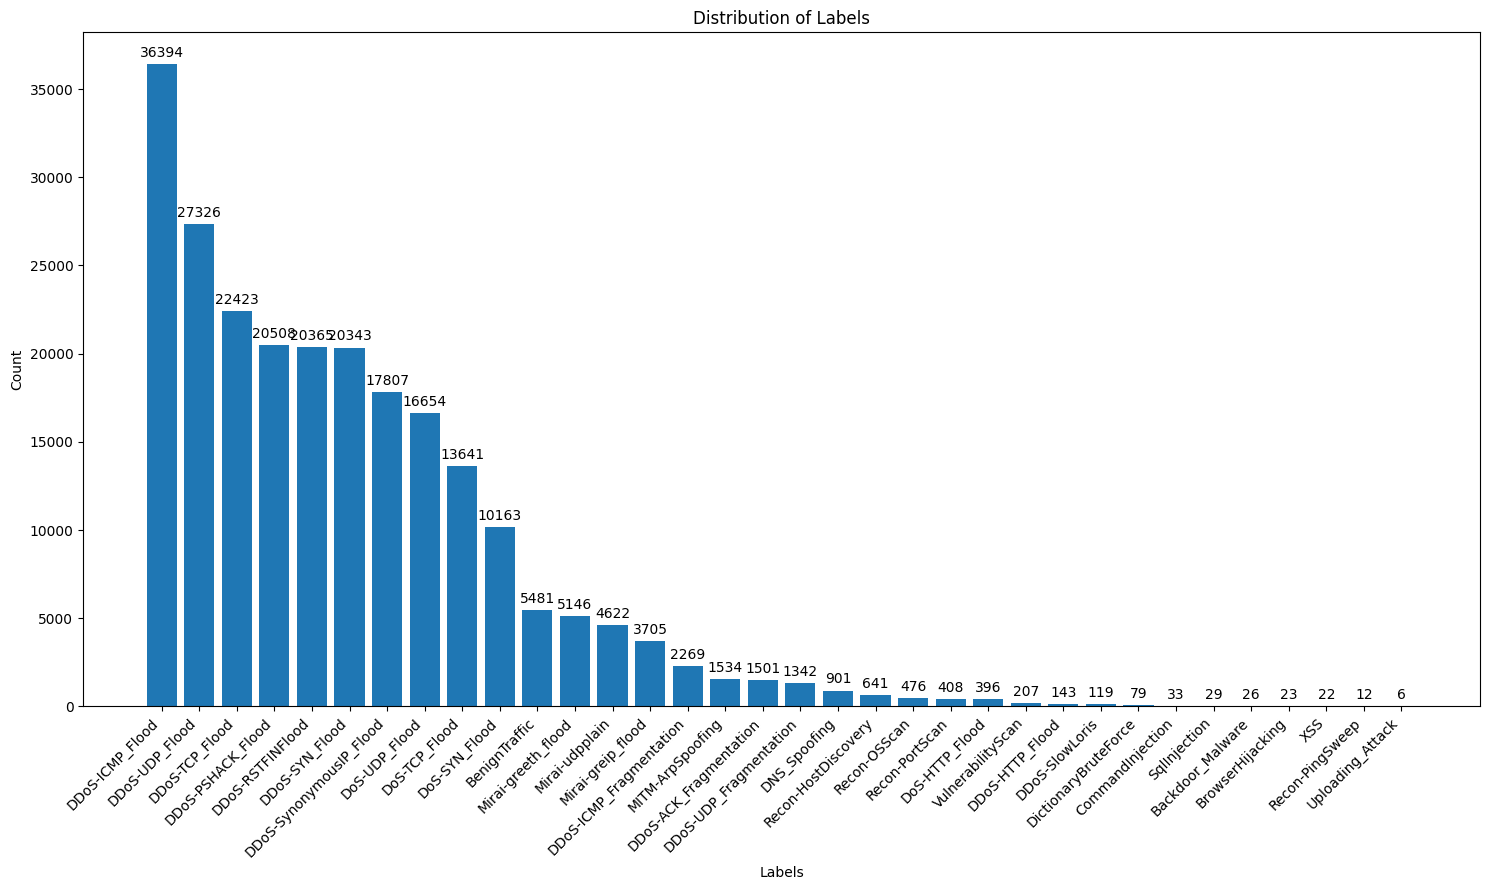

In [ ]:
# Create graph column
fig, ax = plt.subplots(figsize=(15, 9))
bars = ax.bar(df["label"].value_counts().index, df["label"].value_counts().values, width=0.8)

# Rotate the label on the x-axis
ax.set_xticklabels(df["label"].value_counts().index, rotation=45, ha='right')

# Format the number on the y axis
ax.yaxis.set_major_formatter('{:.0f}'.format)

# Add labels and titles
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels')

# Show exact figures at the top of each column
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

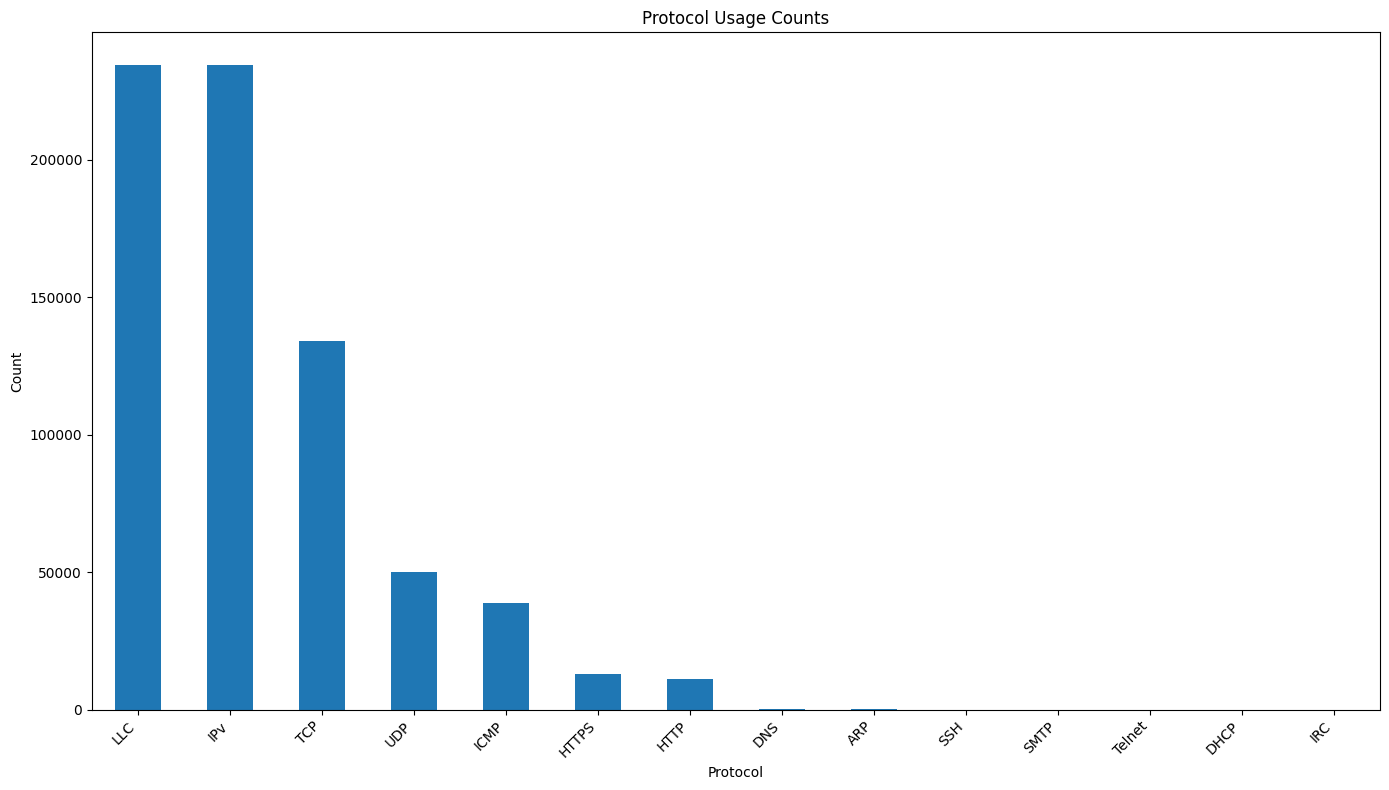

In [ ]:
protocols = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
protocol_counts = df[protocols].sum().sort_values(ascending=False)

# Now let's plot the protocol usage
plt.figure(figsize=(14, 8))
protocol_counts.plot(kind='bar')
plt.title('Protocol Usage Counts')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better fit
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
# class classification
def change_label(df):
  df.label.replace(['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris'],'DDos',inplace=True)
  df.label.replace(['DoS-UDP_Flood','DoS-TCP_Flood','DoS-SYN_Flood','DoS-HTTP_Flood'],'DoS',inplace=True)
  df.label.replace(['Recon-HostDiscovery','Recon-OSScan','Recon-PortScan','Recon-PingSweep','VulnerabilityScan'],'Recon',inplace=True)
  df.label.replace(['MITM-ArpSpoofing','DNS_Spoofing'],'Spoofing',inplace=True)
  df.label.replace(['DictionaryBruteForce'],'BruteForce',inplace=True)
  df.label.replace(['BrowserHijacking','XSS','Uploading_Attack','SqlInjection','CommandInjection','Backdoor_Malware'],'Web-based',inplace=True)
  df.label.replace(['Mirai-greeth_flood','Mirai-udpplain','Mirai-greip_flood'],'Mirai',inplace=True)
  df.label.replace(['BenignTraffic'],'BENIGN',inplace=True)
change_label(df)
change_label(df_test)

# change_label(test_data)

In [ ]:
df_DDOS = df[df['label'].isin(['DDos', 'BENIGN'])]
df_DDOS_test = df_test[df_test['label'].isin(['DDos', 'BENIGN'])]

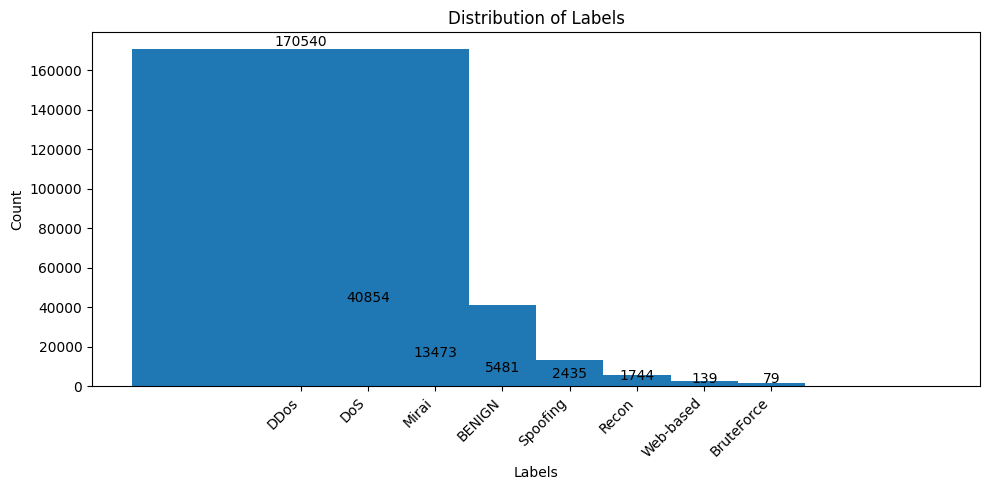

In [ ]:
x_label_distribute = np.array(
   df["label"].value_counts().index.tolist())
y_label_distribute = np.array(
    df["label"].value_counts().values.tolist())

# Create a new Figure with dimensions 10 wide and 5 high
fig = plt.figure(figsize=(10, 5))

# Draw a column chart and display exact figures on top of each column
bars = plt.bar(x_label_distribute, y_label_distribute, width=5,
               align='center')
plt.bar_label(bars, label_type='edge', fontsize=10)

# Rotate the label on the x-axis
plt.xticks(rotation=45, ha='right')

# Format the number on the y-axis
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Add labels and titles
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.tight_layout()

plt.show()


In [ ]:
# create dataframe labels (Dos,Probe,R2L,U2R,normal)
label = pd.DataFrame(df.label)

In [ ]:
# Scale data will convert scale data or data format to the same range to avoid too large data affecting the model
# Scale data for each numeric feature with the train dataset
# Scale using MinMaxScaler to avoid negative values
# Here we only need to scale numeric features and numeric attributes because only numeric attributes have a large range
def scaleStandardData(dataFrame, numeric_cols):
  scaler = preprocessing.StandardScaler()
  for col in numeric_cols:
    arr = dataFrame[col]
    arr = np.array(arr)
    dataFrame[col] = scaler.fit_transform(arr.reshape(len(arr),1))
  return dataFrame

def scaleMinMaxData(dataFrame, numeric_cols):
  scaler = preprocessing.MinMaxScaler()
  for col in numeric_cols:
    arr = dataFrame[col]
    arr = np.array(arr)
    dataFrame[col] = scaler.fit_transform(arr.reshape(len(arr),1))
  return dataFrame

def scaleData(dataFrame, numeric_cols):
  dataFrame = scaleStandardData(dataFrame, numeric_cols)
  dataFrame = scaleMinMaxData(dataFrame, numeric_cols)
  return dataFrame

In [ ]:
Y_TRAIN = df_DDOS['label']
Y_TEST = df_DDOS_test['label']
X_TRAIN = df_DDOS.drop('label', axis=1).copy()
X_TEST = df_DDOS_test.drop('label', axis=1).copy()

In [ ]:
import numpy as np

# Convert all float64 columns to float128
float_cols = X_TRAIN.select_dtypes(include=['float64']).columns
X_TRAIN[float_cols] = X_TRAIN[float_cols].astype(np.float128)
float_cols = X_TEST.select_dtypes(include=['float64']).columns
X_TEST[float_cols] = X_TEST[float_cols].astype(np.float128)

In [ ]:
Y_TRAIN = Y_TRAIN.replace({'BENIGN': 0, 'DDos': 1,'DoS':2,'Mirai':3,'Spoofing':4,'Recon':5,'Web-based':6,'BruteForce':7})
Y_TEST = Y_TEST.replace({'BENIGN': 0, 'DDos': 1,'DoS':2,'Mirai':3,'Spoofing':4,'Recon':5,'Web-based':6,'BruteForce':7})

In [ ]:
numeric_features = X_TRAIN.select_dtypes(include='number').columns
# Scale for common data
X_TRAIN = scaleData(X_TRAIN, numeric_features)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=30, step=1)
rfe.fit(X_TRAIN, Y_TRAIN.astype(int))
X_rfeTrain=rfe.transform(X_TRAIN)
true=rfe.support_
rfecolindex_train=[i for i, x in enumerate(true) if x]
rfecolname_train=list(numeric_features[i] for i in rfecolindex_train)

In [ ]:
X_TRAIN.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,0.000006,0.352941,0.258065,2.113299e-05,2.113299e-05,0.0,0.0,0.0,0.0,...,0.001740,0.000000,0.002357,0.498877,0.68,0.011650,0.000000,0.000000,0.00,0.57697
2,0.010631,0.000855,0.190000,0.323185,1.701970e-06,1.701970e-06,0.0,0.0,0.0,0.0,...,0.085382,0.089819,0.116868,0.500123,0.68,0.246593,0.089816,0.007751,0.94,0.57697
3,0.000000,0.000006,0.352941,0.258065,3.238289e-07,3.238289e-07,0.0,0.0,0.0,0.0,...,0.001740,0.000000,0.002357,0.498879,0.68,0.011650,0.000000,0.000000,0.00,0.57697
4,0.000000,0.000006,0.352941,0.258065,2.805886e-07,2.805886e-07,0.0,1.0,0.0,1.0,...,0.001740,0.000000,0.002357,0.500487,0.68,0.011650,0.000000,0.000000,0.00,0.57697
5,0.000000,0.000006,0.352941,0.258065,1.807186e-06,1.807186e-06,0.0,0.0,0.0,0.0,...,0.001740,0.000000,0.002357,0.498830,0.68,0.011650,0.000000,0.000000,0.00,0.57697


In [ ]:
rfe.fit(X_TRAIN, Y_TRAIN.astype(int))
X_rfeTrain=rfe.transform(X_TRAIN)
true=rfe.support_
rfecolindex_train=[i for i, x in enumerate(true) if x]
rfecolname_train=list(numeric_features[i] for i in rfecolindex_train)

In [ ]:
print('Features selected for Train:',rfecolname_train)

Features selected for Train: ['flow_duration', 'Header_Length', 'Protocol Type', 'Srate', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


In [ ]:
# List of selected important features
selected_features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'syn_flag_number', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'UDP', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']

# Select important features from the training set
X_rfeTrain = X_TRAIN.loc[:, selected_features]
X_TEST = X_TEST.loc[:, selected_features]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rfeTrain, Y_TRAIN, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_TEST.shape)
print(Y_train.shape)
print(Y_test.shape)

(140816, 30)
(176021, 30)
(140816,)
(35205,)


In [ ]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(X_train_scaled[..., np.newaxis], Y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled[..., np.newaxis], Y_test))

Epoch 1/10
2201/2201 [==============================] - 11s 4ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 5.4508e-04 - val_accuracy: 0.9999
Epoch 2/10
2201/2201 [==============================] - 9s 4ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 9.5991e-04 - val_accuracy: 0.9999
Epoch 3/10
2201/2201 [==============================] - 8s 4ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 2.6749e-04 - val_accuracy: 0.9999
Epoch 4/10
2201/2201 [==============================] - 9s 4ms/step - loss: 7.4847e-04 - accuracy: 0.9999 - val_loss: 5.9107e-04 - val_accuracy: 0.9999
Epoch 5/10
2201/2201 [==============================] - 10s 5ms/step - loss: 7.0090e-04 - accuracy: 0.9998 - val_loss: 2.4541e-04 - val_accuracy: 0.9999
Epoch 6/10
2201/2201 [==============================] - 8s 4ms/step - loss: 5.9462e-04 - accuracy: 0.9999 - val_loss: 3.3411e-04 - val_accuracy: 0.9999
Epoch 7/10
2201/2201 [==============================] - 9s 4ms/step - loss: 0.0010 - accuracy: 0.9

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Reshape the data to match the input shape expected by the LSTM layer
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm = lstm_model.fit(X_train_lstm, Y_train, epochs=10, batch_size=64, validation_data=(X_test_lstm, Y_test))

Epoch 1/10
2201/2201 [==============================] - 14s 5ms/step - loss: 0.0137 - accuracy: 0.9981 - val_loss: 4.5452e-04 - val_accuracy: 0.9999
Epoch 2/10
2201/2201 [==============================] - 12s 6ms/step - loss: 3.2223e-04 - accuracy: 0.9999 - val_loss: 2.3759e-04 - val_accuracy: 0.9999
Epoch 3/10
2201/2201 [==============================] - 10s 5ms/step - loss: 2.7487e-04 - accuracy: 0.9999 - val_loss: 4.3032e-05 - val_accuracy: 1.0000
Epoch 4/10
2201/2201 [==============================] - 17s 8ms/step - loss: 9.0806e-05 - accuracy: 1.0000 - val_loss: 8.1517e-05 - val_accuracy: 1.0000
Epoch 5/10
2201/2201 [==============================] - 10s 5ms/step - loss: 1.2365e-04 - accuracy: 1.0000 - val_loss: 1.1325e-05 - val_accuracy: 1.0000
Epoch 6/10
2201/2201 [==============================] - 11s 5ms/step - loss: 4.0546e-05 - accuracy: 1.0000 - val_loss: 3.2529e-05 - val_accuracy: 1.0000
Epoch 7/10
2201/2201 [==============================] - 11s 5ms/step - loss: 8.5473e-0

In [ ]:
# Define the CNN-LSTM hybrid model
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(64, activation='relu'))
cnn_lstm_model.add(Dropout(0.5))
cnn_lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the CNN-LSTM model
cnn_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN-LSTM model
history_cnn_lstm = cnn_lstm_model.fit(X_train_scaled[..., np.newaxis], Y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled[..., np.newaxis], Y_test))

Epoch 1/10
2201/2201 [==============================] - 21s 7ms/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 6.6819e-04 - val_accuracy: 0.9998
Epoch 2/10
2201/2201 [==============================] - 14s 6ms/step - loss: 8.0098e-04 - accuracy: 0.9998 - val_loss: 4.9450e-04 - val_accuracy: 0.9998
Epoch 3/10
2201/2201 [==============================] - 14s 6ms/step - loss: 6.3550e-04 - accuracy: 0.9998 - val_loss: 2.0019e-04 - val_accuracy: 0.9999
Epoch 4/10
2201/2201 [==============================] - 13s 6ms/step - loss: 4.0887e-04 - accuracy: 0.9999 - val_loss: 3.3336e-05 - val_accuracy: 1.0000
Epoch 5/10
2201/2201 [==============================] - 13s 6ms/step - loss: 3.8064e-04 - accuracy: 0.9999 - val_loss: 1.0037e-04 - val_accuracy: 0.9999
Epoch 6/10
2201/2201 [==============================] - 13s 6ms/step - loss: 3.4954e-04 - accuracy: 0.9999 - val_loss: 1.8741e-05 - val_accuracy: 1.0000
Epoch 7/10
2201/2201 [==============================] - 13s 6ms/step - loss: 2.4058e-0

1101/1101 [==============================] - 3s 3ms/step - loss: 1.6577e-06 - accuracy: 1.0000
CNN Test Accuracy: 0.9999715685844421
LSTM Test Accuracy: 0.9670785665512085
CNN-LSTM Test Accuracy: 1.0


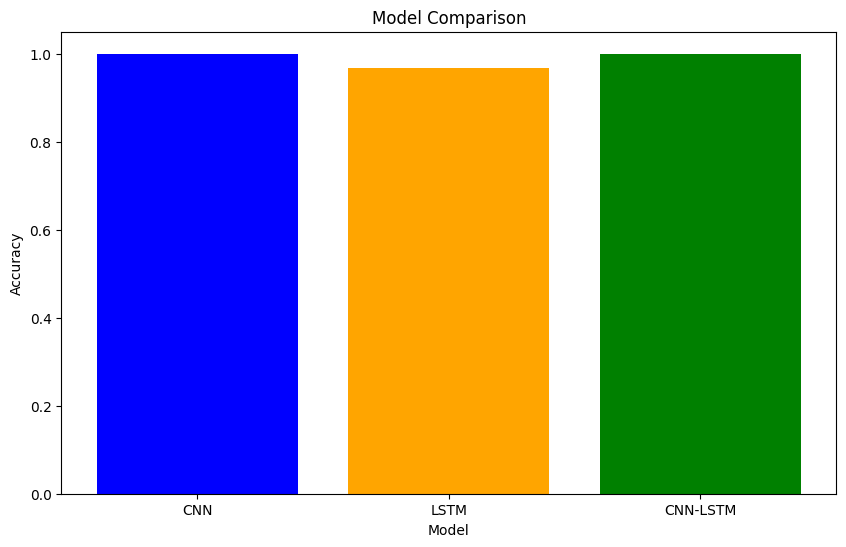

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the models
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_scaled[..., np.newaxis], Y_test)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_scaled[..., np.newaxis], Y_test)
cnn_lstm_loss, cnn_lstm_accuracy = cnn_lstm_model.evaluate(X_test_scaled[..., np.newaxis], Y_test)

# Print the results
print("CNN Test Accuracy:", cnn_accuracy)
print("LSTM Test Accuracy:", lstm_accuracy)
print("CNN-LSTM Test Accuracy:", cnn_lstm_accuracy)

# Visualize the results
models = ['CNN', 'LSTM', 'CNN-LSTM']
accuracies = [cnn_accuracy, lstm_accuracy, cnn_lstm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [ ]:
# Evaluate the models
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_scaled[..., np.newaxis], Y_test)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, Y_test)
cnn_lstm_loss, cnn_lstm_accuracy = cnn_lstm_model.evaluate(X_test_scaled[..., np.newaxis], Y_test)

1101/1101 [==============================] - 3s 3ms/step - loss: 1.6577e-06 - accuracy: 1.0000


CNN Test Accuracy: 0.9999715685844421
LSTM Test Accuracy: 1.0
CNN-LSTM Test Accuracy: 1.0


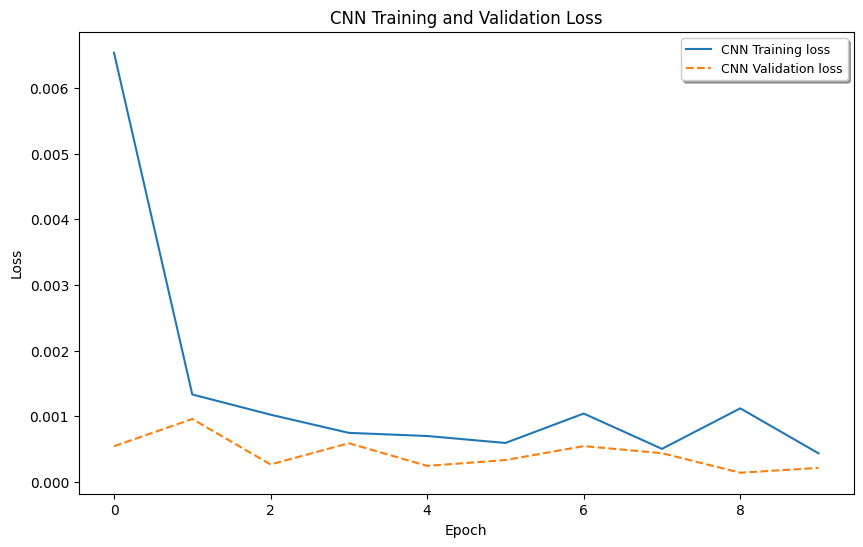

In [ ]:
# Print the results
print("CNN Test Accuracy:", cnn_accuracy)
print("LSTM Test Accuracy:", lstm_accuracy)
print("CNN-LSTM Test Accuracy:", cnn_lstm_accuracy)

# Plot the training and validation loss for CNN
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['loss'], label="CNN Training loss")
plt.plot(history_cnn.history['val_loss'], label="CNN Validation loss", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("CNN Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.savefig('/content/drive/MyDrive/IoT/cnn_accuracy.png')
plt.show()
plt.show()

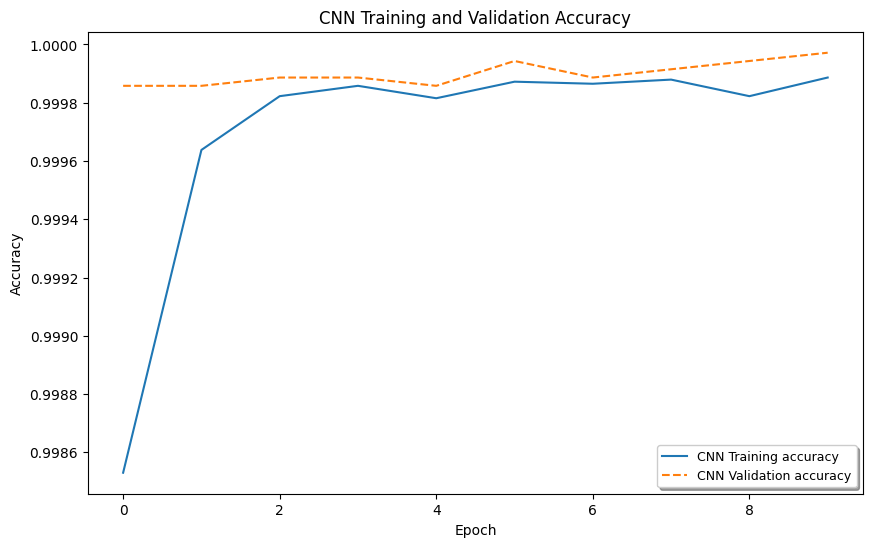

In [ ]:
# Plot the training and validation accuracy for CNN
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label="CNN Training accuracy")
plt.plot(history_cnn.history['val_accuracy'], label="CNN Validation accuracy", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("CNN Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

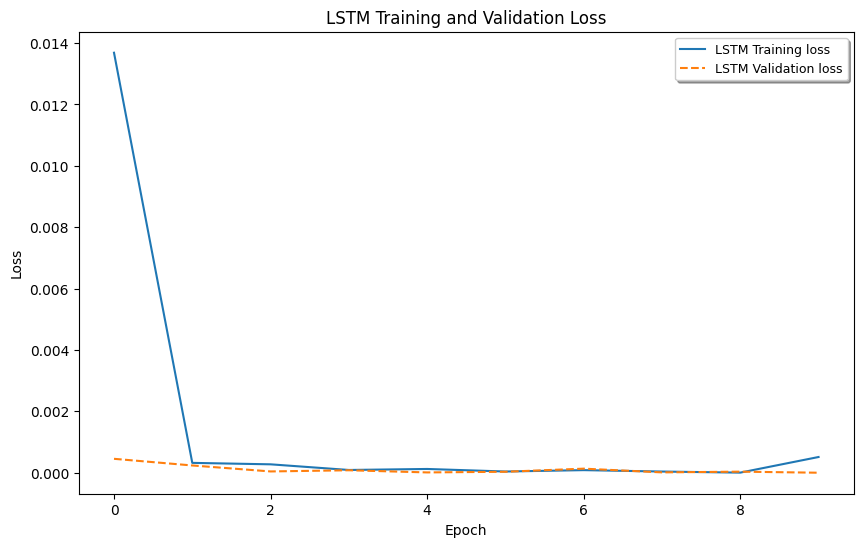

In [ ]:
# Plot the training and validation loss for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label="LSTM Training loss")
plt.plot(history_lstm.history['val_loss'], label="LSTM Validation loss", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("LSTM Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

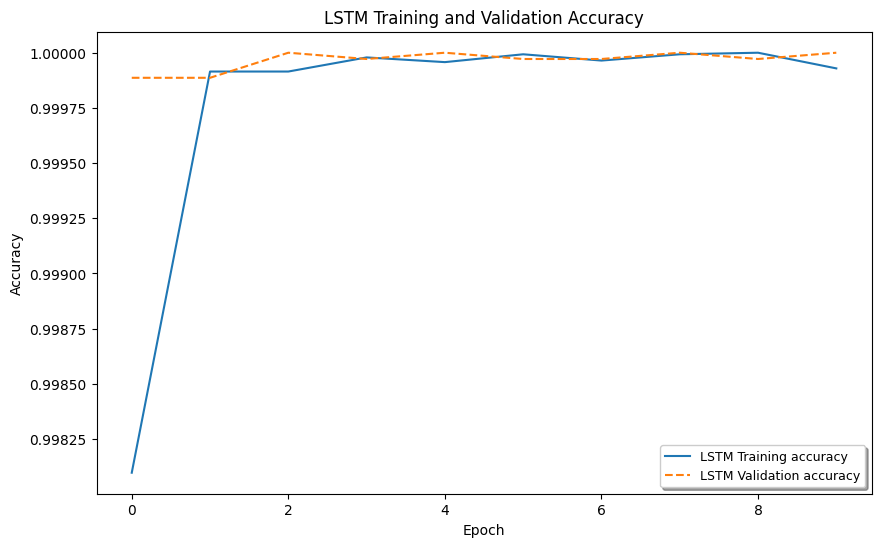

In [ ]:
# Plot the training and validation accuracy for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label="LSTM Training accuracy")
plt.plot(history_lstm.history['val_accuracy'], label="LSTM Validation accuracy", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("LSTM Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

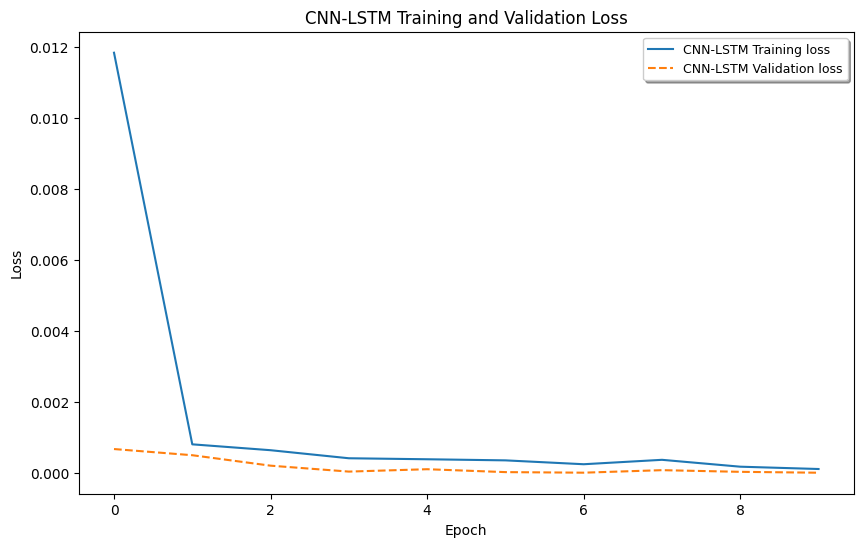

In [ ]:
# Plot the training and validation loss for CNN-LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_cnn_lstm.history['loss'], label="CNN-LSTM Training loss")
plt.plot(history_cnn_lstm.history['val_loss'], label="CNN-LSTM Validation loss", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("CNN-LSTM Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

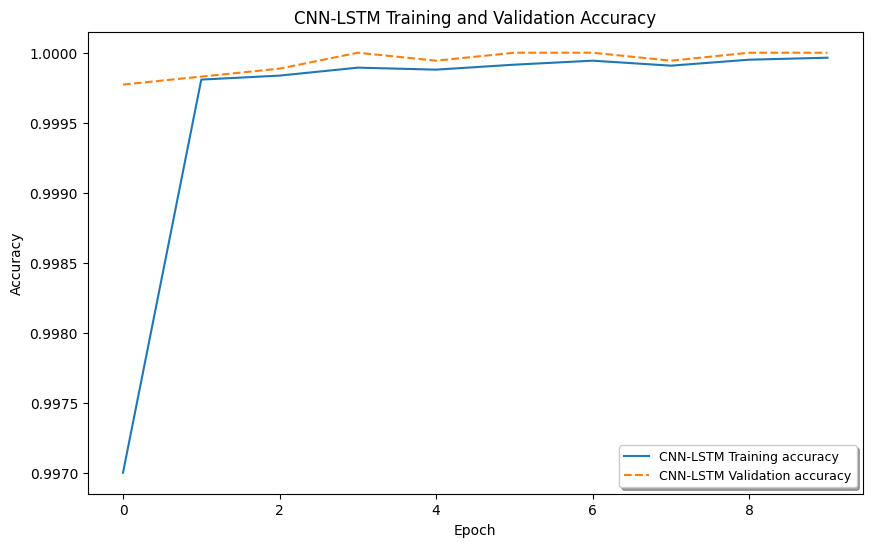

In [ ]:
# Plot the training and validation accuracy for CNN-LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_cnn_lstm.history['accuracy'], label="CNN-LSTM Training accuracy")
plt.plot(history_cnn_lstm.history['val_accuracy'], label="CNN-LSTM Validation accuracy", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("CNN-LSTM Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
cnn_y_pred = cnn_model.predict(X_test_scaled[..., np.newaxis])
lstm_y_pred = lstm_model.predict(X_test_lstm)
cnn_lstm_y_pred = cnn_lstm_model.predict(X_test_scaled[..., np.newaxis])

# Convert predictions to class labels
cnn_y_pred_classes = np.argmax(cnn_y_pred, axis=1)
lstm_y_pred_classes = np.argmax(lstm_y_pred, axis=1)
cnn_lstm_y_pred_classes = np.argmax(cnn_lstm_y_pred, axis=1)

# Print classification reports
print("CNN Classification Report:")
print(classification_report(Y_test, cnn_y_pred_classes, digits=4))

print("LSTM Classification Report:")
print(classification_report(Y_test, lstm_y_pred_classes, digits=4))

print("CNN-LSTM Classification Report:")
print(classification_report(Y_test, cnn_lstm_y_pred_classes, digits=4))

1101/1101 [==============================] - 2s 2ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9991    0.9996      1159
           1     1.0000    1.0000    1.0000     34046

    accuracy                         1.0000     35205
   macro avg     1.0000    0.9996    0.9998     35205
weighted avg     1.0000    1.0000    1.0000     35205

LSTM Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1159
           1     1.0000    1.0000    1.0000     34046

    accuracy                         1.0000     35205
   macro avg     1.0000    1.0000    1.0000     35205
weighted avg     1.0000    1.0000    1.0000     35205

CNN-LSTM Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1159
           1     1.0000    1.0000    1.0000     34046

    accuracy                         1

1101/1101 [==============================] - 2s 2ms/step


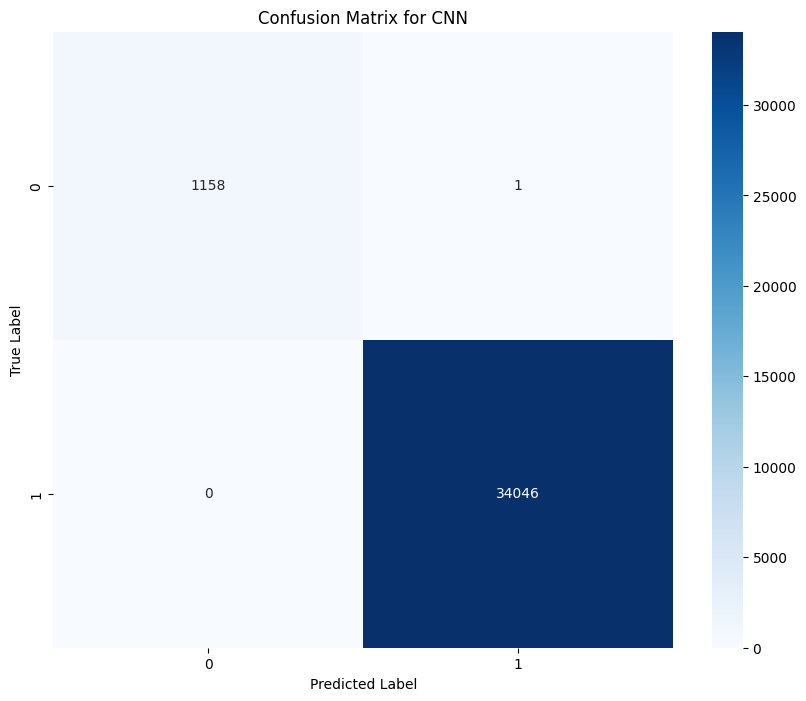

1101/1101 [==============================] - 2s 2ms/step


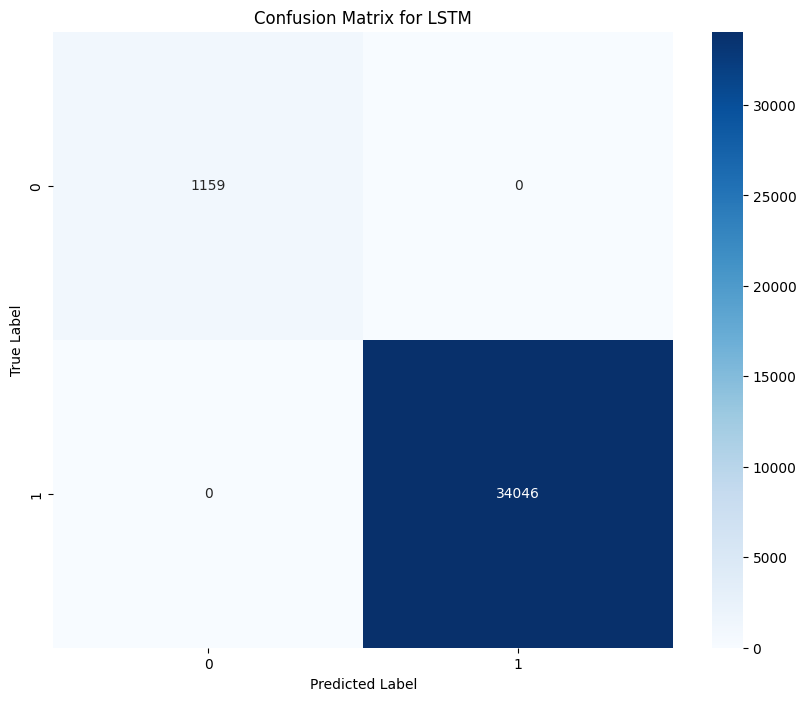

1101/1101 [==============================] - 3s 3ms/step


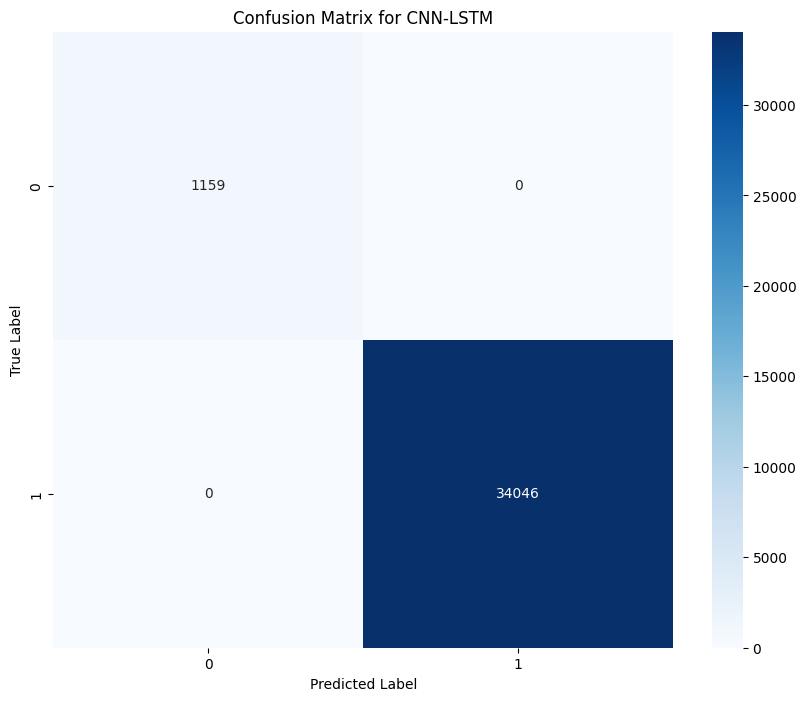

CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00     34046

    accuracy                           1.00     35205
   macro avg       1.00      1.00      1.00     35205
weighted avg       1.00      1.00      1.00     35205


LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00     34046

    accuracy                           1.00     35205
   macro avg       1.00      1.00      1.00     35205
weighted avg       1.00      1.00      1.00     35205


CNN-LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00     34046

    accuracy                           1.00     35205
   macro avg       1.00      1.00      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluate and plot confusion matrix for CNN
cnn_y_pred = cnn_model.predict(X_test_scaled[..., np.newaxis])
cnn_y_pred_classes = np.argmax(cnn_y_pred, axis=1)
plot_confusion_matrix(Y_test, cnn_y_pred_classes, "CNN")

# Evaluate and plot confusion matrix for LSTM
lstm_y_pred = lstm_model.predict(X_test_lstm)
lstm_y_pred_classes = np.argmax(lstm_y_pred, axis=1)
plot_confusion_matrix(Y_test, lstm_y_pred_classes, "LSTM")

# Evaluate and plot confusion matrix for CNN-LSTM
cnn_lstm_y_pred = cnn_lstm_model.predict(X_test_scaled[..., np.newaxis])
cnn_lstm_y_pred_classes = np.argmax(cnn_lstm_y_pred, axis=1)
plot_confusion_matrix(Y_test, cnn_lstm_y_pred_classes, "CNN-LSTM")

# Print classification reports for all models
print("CNN Classification Report:")
print(classification_report(Y_test, cnn_y_pred_classes))

print("\nLSTM Classification Report:")
print(classification_report(Y_test, lstm_y_pred_classes))

print("\nCNN-LSTM Classification Report:")
print(classification_report(Y_test, cnn_lstm_y_pred_classes))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

1101/1101 [==============================] - 3s 3ms/step


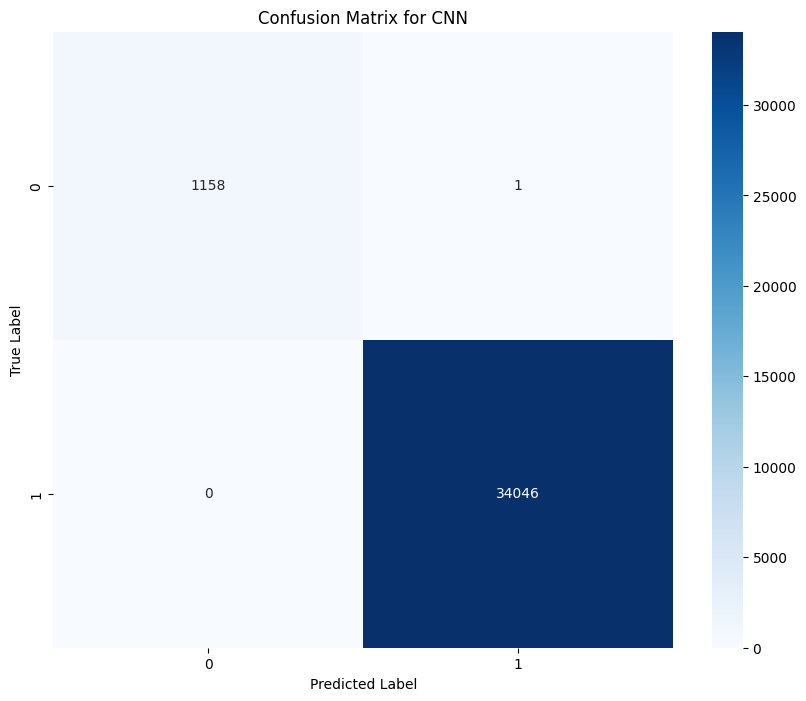

In [ ]:
# Evaluate and plot confusion matrix for CNN
cnn_y_pred = cnn_model.predict(X_test_scaled[..., np.newaxis])
cnn_y_pred_classes = np.argmax(cnn_y_pred, axis=1)
plot_confusion_matrix(Y_test, cnn_y_pred_classes, "CNN")

1101/1101 [==============================] - 3s 3ms/step


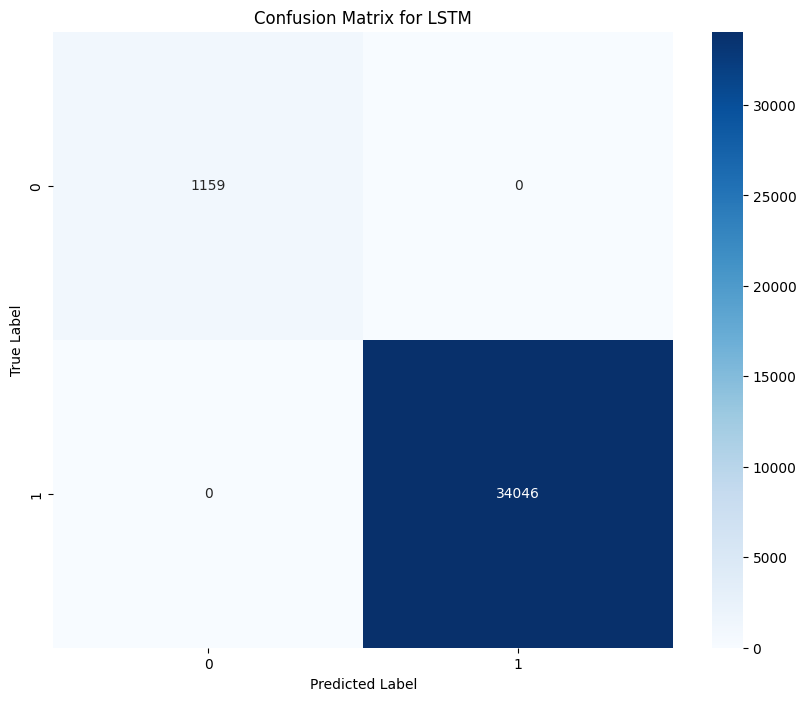

In [ ]:
# Evaluate and plot confusion matrix for LSTM
lstm_y_pred = lstm_model.predict(X_test_lstm)
lstm_y_pred_classes = np.argmax(lstm_y_pred, axis=1)
plot_confusion_matrix(Y_test, lstm_y_pred_classes, "LSTM")

1101/1101 [==============================] - 4s 3ms/step


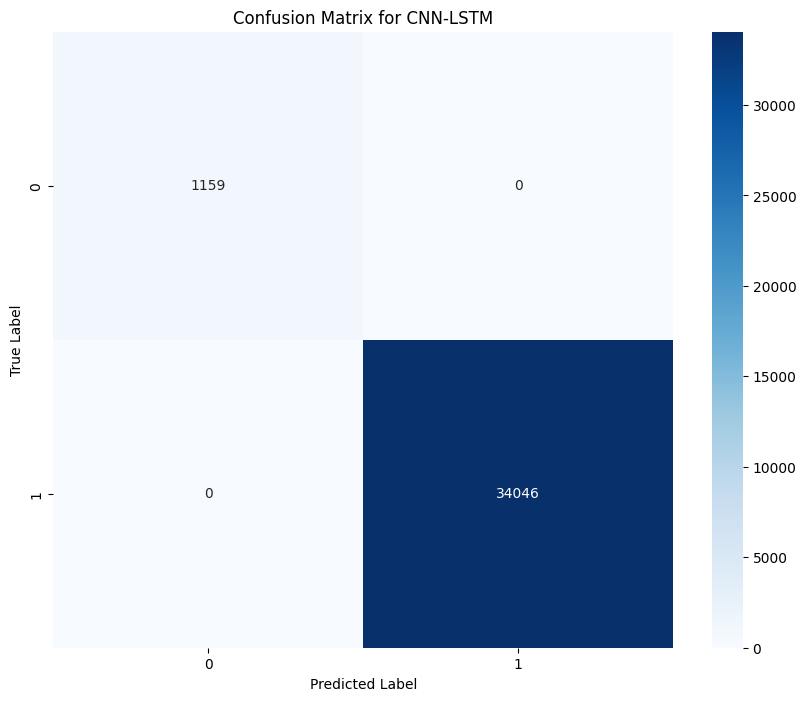

In [ ]:
# Evaluate and plot confusion matrix for CNN-LSTM
cnn_lstm_y_pred = cnn_lstm_model.predict(X_test_scaled[..., np.newaxis])
cnn_lstm_y_pred_classes = np.argmax(cnn_lstm_y_pred, axis=1)
plot_confusion_matrix(Y_test, cnn_lstm_y_pred_classes, "CNN-LSTM")

In [ ]:
# Print classification reports for all models
print("CNN Classification Report:")
print(classification_report(Y_test, cnn_y_pred_classes))

print("\nLSTM Classification Report:")
print(classification_report(Y_test, lstm_y_pred_classes))

print("\nCNN-LSTM Classification Report:")
print(classification_report(Y_test, cnn_lstm_y_pred_classes))

CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00     34046

    accuracy                           1.00     35205
   macro avg       1.00      1.00      1.00     35205
weighted avg       1.00      1.00      1.00     35205


LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00     34046

    accuracy                           1.00     35205
   macro avg       1.00      1.00      1.00     35205
weighted avg       1.00      1.00      1.00     35205


CNN-LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00     34046

    accuracy                           1.00     35205
   macro avg       1.00      1.00      

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall curve
def plot_precision_recall(y_true, y_pred_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    average_precision = average_precision_score(y_true, y_pred_prob)

    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {title}')
    plt.legend()
    plt.show()

In [ ]:
# Get predicted probabilities for CNN
cnn_y_pred_prob = cnn_model.predict(X_test_scaled[..., np.newaxis])
cnn_y_pred_prob = np.max(cnn_y_pred_prob, axis=1)  # Assuming binary classification or use specific class probabilities

1101/1101 [==============================] - 3s 3ms/step


In [ ]:
# Get predicted probabilities for CNN
cnn_y_pred_prob = cnn_model.predict(X_test_scaled[..., np.newaxis])
cnn_y_pred_prob = np.max(cnn_y_pred_prob, axis=1)  # Assuming binary classification or use specific class probabilities

1101/1101 [==============================] - 3s 2ms/step


In [ ]:
# Get predicted probabilities for LSTM
lstm_y_pred_prob = lstm_model.predict(X_test_lstm)
lstm_y_pred_prob = np.max(lstm_y_pred_prob, axis=1)

# Get predicted probabilities for CNN-LSTM
cnn_lstm_y_pred_prob = cnn_lstm_model.predict(X_test_scaled[..., np.newaxis])
cnn_lstm_y_pred_prob = np.max(cnn_lstm_y_pred_prob, axis=1)

1101/1101 [==============================] - 4s 3ms/step


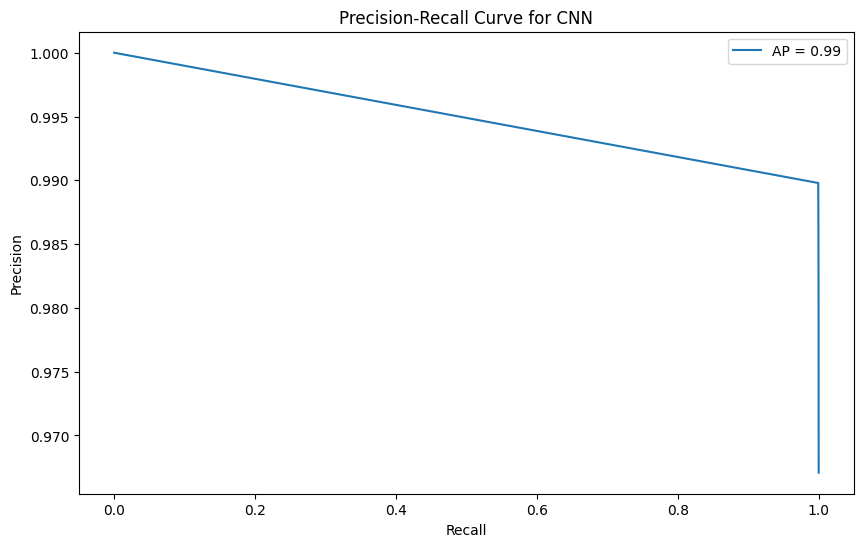

In [ ]:
# Plot Precision-Recall curve for CNN
plot_precision_recall(Y_test, cnn_y_pred_prob, "CNN")

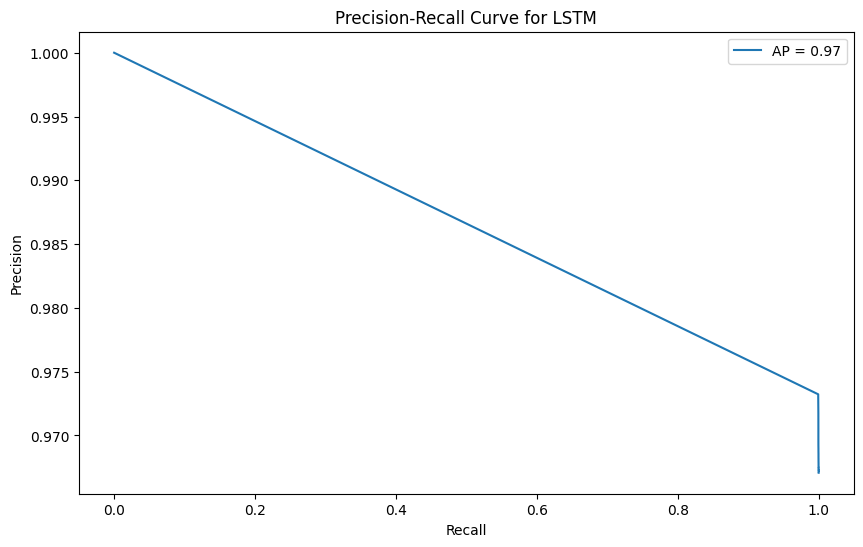

In [ ]:
# Plot Precision-Recall curve for LSTM
plot_precision_recall(Y_test, lstm_y_pred_prob, "LSTM")

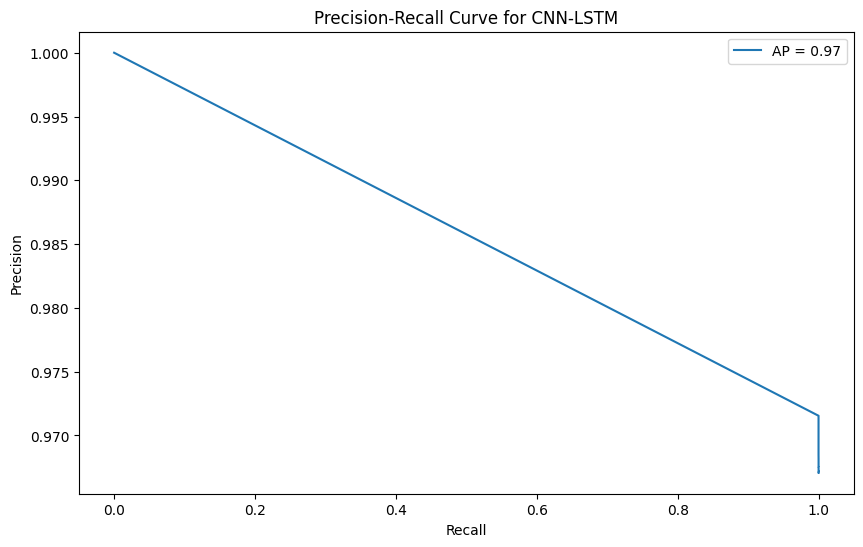

In [ ]:
# Plot Precision-Recall curve for CNN-LSTM
plot_precision_recall(Y_test, cnn_lstm_y_pred_prob, "CNN-LSTM")

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc(y_true, y_pred_prob, num_classes, title):
    plt.figure(figsize=(10, 6))

    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_pred_prob[:, i])
        auc_score = roc_auc_score(y_true == i, y_pred_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {title}')
    plt.legend()
    plt.show()

# Get predicted probabilities for CNN
cnn_y_pred_prob = cnn_model.predict(X_test_scaled[..., np.newaxis])

# Get predicted probabilities for LSTM
lstm_y_pred_prob = lstm_model.predict(X_test_lstm)

# Get predicted probabilities for CNN-LSTM
cnn_lstm_y_pred_prob = cnn_lstm_model.predict(X_test_scaled[..., np.newaxis])

1101/1101 [==============================] - 5s 4ms/step


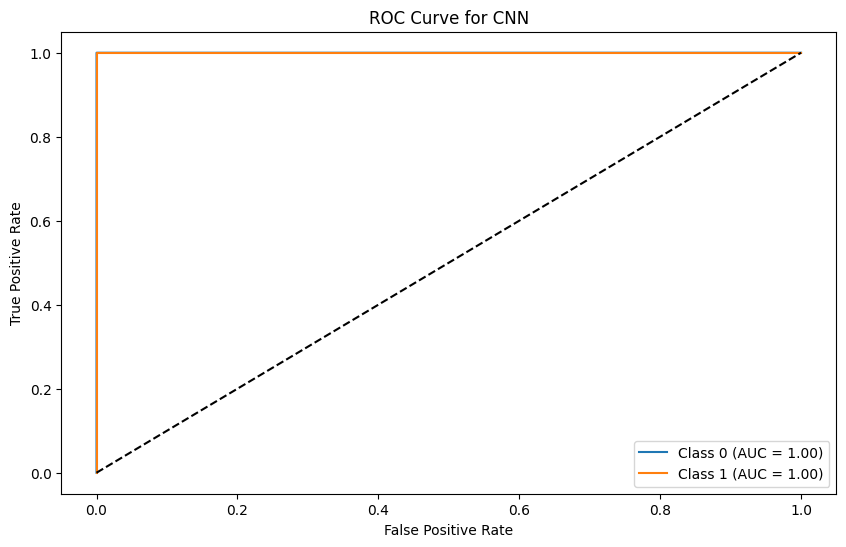

In [ ]:
# Plot ROC curve for CNN
plot_roc(Y_test, cnn_y_pred_prob, num_classes, "CNN")

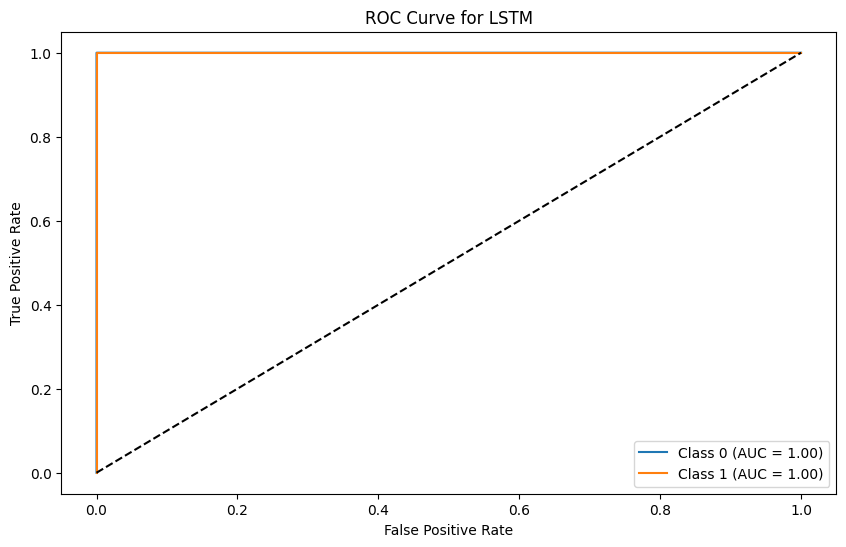

In [ ]:
# Plot ROC curve for LSTM
plot_roc(Y_test, lstm_y_pred_prob, num_classes, "LSTM")

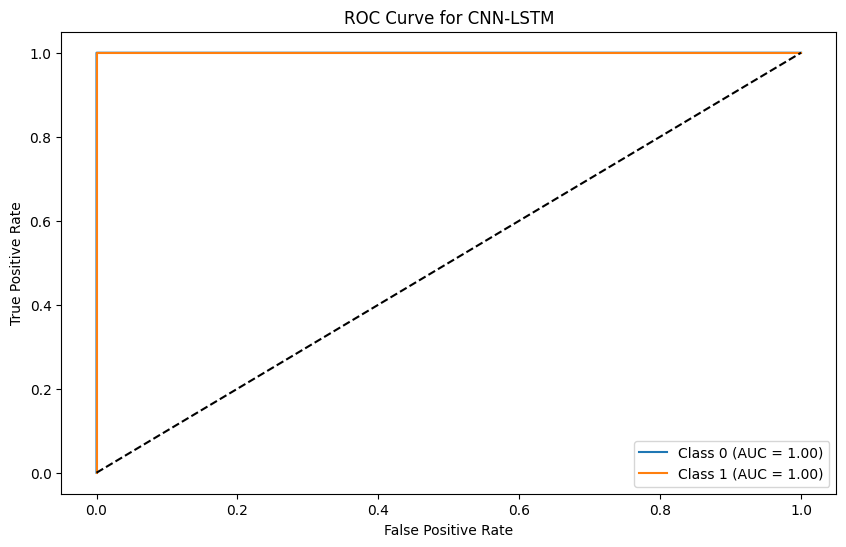

In [ ]:
# Plot ROC curve for CNN-LSTM
plot_roc(Y_test, cnn_lstm_y_pred_prob, num_classes, "CNN-LSTM")

In [ ]:
# Save the CNN model
cnn_model.save('/content/drive/MyDrive/IoT/model_saved2/cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the CNN model
cnn_model.save('/content/drive/MyDrive/IoT/model_saved2/cnn_model.pb')

In [ ]:
# Save the LSTM model
lstm_model.save('/content/drive/MyDrive/IoT/model_saved2/lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the LSTM model
lstm_model.save('/content/drive/MyDrive/IoT/model_saved2/lstm_model.pb')

In [ ]:
# Save the CNN-LSTM model
cnn_lstm_model.save('/content/drive/MyDrive/IoT/model_saved2/cnn_lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the CNN-LSTM model
cnn_lstm_model.save('/content/drive/MyDrive/IoT/model_saved2/cnn_lstm_model.pb')

In [ ]:
# Print the model summaries
print("CNN Model Summary:")
cnn_model.summary()

CNN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 64)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                57408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                     

In [ ]:
print("\nLSTM Model Summary:")
lstm_model.summary()


LSTM Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                24320     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 28610 (111.76 KB)
Trainable params: 28610 (111.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("\nCNN-LSTM Model Summary:")
cnn_lstm_model.summary()


CNN-LSTM Model Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 29, 64)            192       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 14, 64)            0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 130       
                             